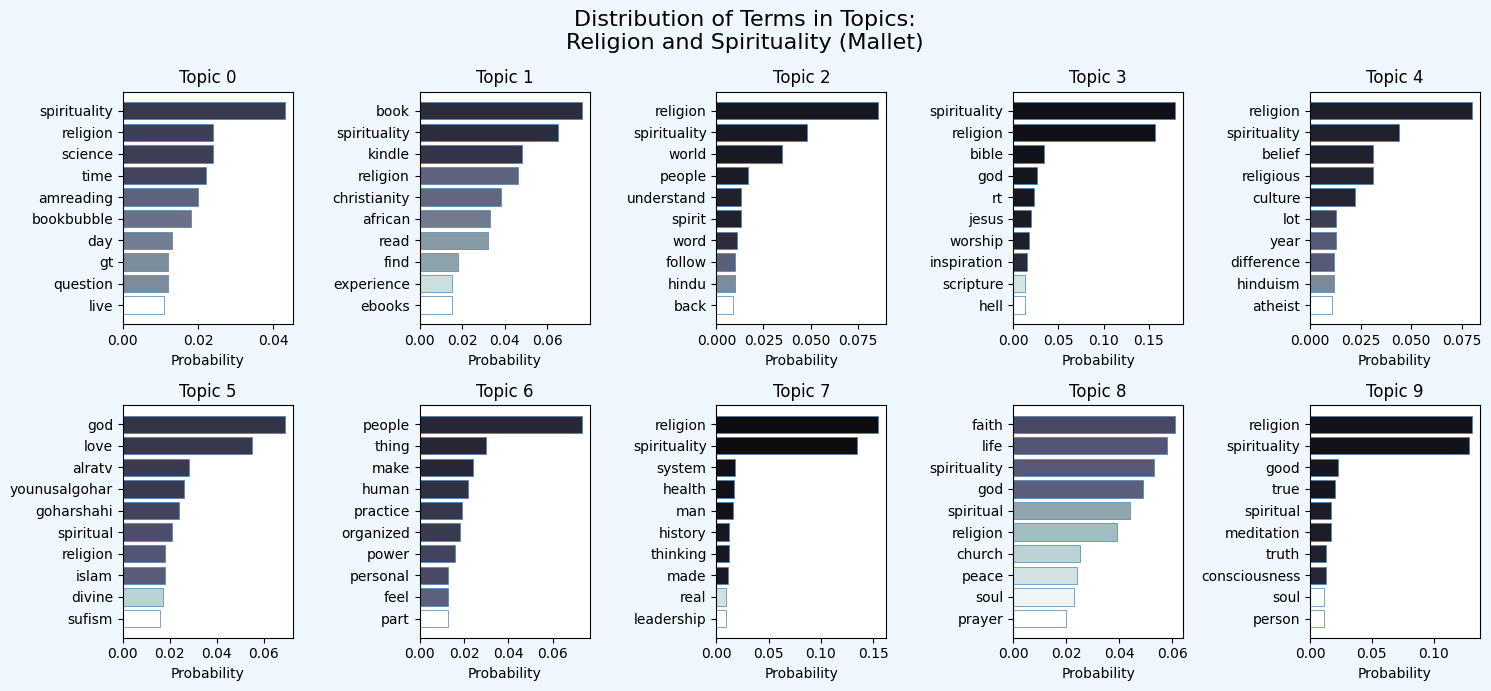

In [54]:
import os
import pandas as pd
from gensim.models.wrappers import LdaMallet
import matplotlib.pyplot as plt
import numpy as np

def load_lda_model(model_path):
    return LdaMallet.load(model_path)

def extract_topics(lda_model):
    return lda_model.show_topics()

def plot_lda_topics(topics, num_rows, num_cols, suptitle, save_dir=None, model_name=None):
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 7))

    for i, (topic_num, topic_terms) in enumerate(topics):
        row = i // num_cols
        col = i % num_cols

        terms = [term.split('"')[1] for term in topic_terms.split(' + ')]
        weights = [float(weight.split('*')[0]) for weight in topic_terms.split(' + ')]

        normalized_weights = np.array(weights) / max(weights)
        colors = plt.cm.bone(normalized_weights)

        axs[row, col].barh(terms[::-1], weights[::-1], color=colors, edgecolor='grey')  # Add grey border
        axs[row, col].set_xlabel('Probability')
        axs[row, col].set_title(f'Topic {topic_num}')

    fig.patch.set_facecolor('aliceblue') 
    plt.suptitle(suptitle, fontsize=16)
    plt.tight_layout()

    if save_dir and model_name:
        os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist
        save_filename = f"{model_name}_plot_distribution.png"
        save_path = os.path.join(save_dir, save_filename)
        plt.savefig(save_path, bbox_inches='tight')  # Save the figure as PNG
    else:
        plt.show()

# Example usage
model_path = '/Users/shtosti/Dropbox/study/UZH/FW23/SMA/topic_modelling/Mallet/basic/models/lda_religion_AND_spirituality_10_topics'
suptitle = 'Distribution of Terms in Topics:\nReligion and Spirituality (Mallet)'
output_dir = 'plot_visualization'

# Extract model name from the model path
model_name = os.path.splitext(os.path.basename(model_path))[0]

lda_model = load_lda_model(model_path)
topics = extract_topics(lda_model)

plot_lda_topics(topics, num_rows=2, num_cols=5, suptitle=suptitle, save_dir=output_dir, model_name=model_name)
